### Multidimensional scaling (MDS) of the Levenshtein sequence distance

In [1]:
import numpy as np
import Levenshtein
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.manifold import MDS
import pandas as pd
import sys
import random
import os
import Levenshtein
import fastcluster as fc
import scipy.cluster.hierarchy as hier
import pickle
# To allow imports from common directory
sys.path.append('/Users/aniton/Documents/GitHub/UniRep-analysis/common/')
from plot_style_utils import set_pub_plot_context, rep_names, save_for_pub, label_point
from embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [6]:
wt_ssm2 = pd.read_csv("/Users/aniton/Documents/GitHub/UniRep-analysis/gpcrf.csv", index_col=0)
wt_ssm2

,sequence
name,
ADGRL1,MARLAAVLWNLCVTAVLVTSATQGLSRAGLPFGLMRRELACEGYPI...
5HT1B_HUMAN,MEEPGAQCAPPPPAGSETWVPQANLSSAPSQNCSAKDYIYQDSISL...
5HT7R_HUMAN,MMDVNSSGRPDLYGHLRSFLLPEVGRGLPDLSPDGGADPVAGSWAP...
AGRG6_HUMAN,MMFRSDRMWSCHWKWKPSPLLFLFALYIMCVPHSVWGCANCRVVLS...
AGRL4_HUMAN,MKRLPLLVVFSTLLNCSYTQNCTKTPCLPNAKCEIRNGIEACYCNM...
5HT1F_HUMAN,MDFLNSSDQNLTSEELLNRMPSKILVSLTLSGLALMTTTINSLVIA...
CALCR_HUMAN,MRFTFTSRCLALFLLLNHPTPILPAFSNQTYPTIEPKPFLYVVGRK...
CALRL_HUMAN,MEKKCTLNFLVLLPFFMILVTAELEESPEDSIQLGVTRNKIMTAQY...
5HT1D_HUMAN,MSPLNQSAEGLPQEASNRSLNATETSEAWDPRTLQALKISLAVVLS...


In [7]:
wt_ssm2 = wt_ssm2.reset_index()

In [8]:
lev_d = lev_dist_matrix(wt_ssm2.sequence.values)
lev_d

array([[   0., 1233., 1204., 1163., 1118., 1249., 1205., 1204., 1236.],
       [1233.,    0.,  340.,  990.,  525.,  207.,  378.,  366.,  149.],
       [1204.,  340.,    0.,  975.,  546.,  337.,  406.,  397.,  333.],
       [1163.,  990.,  975.,    0.,  926.,  997.,  984.,  971.,  999.],
       [1118.,  525.,  546.,  926.,    0.,  541.,  539.,  531.,  529.],
       [1249.,  207.,  337.,  997.,  541.,    0.,  377.,  366.,  199.],
       [1205.,  378.,  406.,  984.,  539.,  377.,    0.,  208.,  379.],
       [1204.,  366.,  397.,  971.,  531.,  366.,  208.,    0.,  365.],
       [1236.,  149.,  333.,  999.,  529.,  199.,  379.,  365.,    0.]])

In [9]:
mds = MDS(n_components=2, n_init=8, verbose=10, n_jobs=4, random_state=42, dissimilarity='precomputed')
mds.fit(lev_d)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   8 | elapsed:    2.1s remaining:    6.3s
[Parallel(n_jobs=4)]: Done   3 out of   8 | elapsed:    2.1s remaining:    3.5s
[Parallel(n_jobs=4)]: Done   4 out of   8 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=4)]: Done   5 out of   8 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:    2.2s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.2s finished


MDS(dissimilarity='precomputed', n_init=8, n_jobs=4, random_state=42,
    verbose=10)

In [10]:
print(mds.embedding_.shape)
mds.embedding_

(9, 2)


array([[ 489.32314053,  896.63124591],
       [  68.51900599, -271.76302528],
       [ 261.93996344, -183.35798275],
       [-600.81900893,  530.20509053],
       [  78.35403582,  167.93228817],
       [   9.37639213, -384.30451306],
       [-236.95287483, -257.56087695],
       [-185.88288136, -162.15446265],
       [ 116.1422272 , -335.62776392]])

In [11]:
components = mds.embedding_


In [12]:
# Compute the string median and also vidualize this
median_seq = Levenshtein.median(wt_ssm2['sequence'].values.tolist())
median_seq

'MEFLNSSARCLPLLCAFSELLNPSPLLPAFTLQGLAPLPESPMAKDPIFLGVIGALKIMVAGLSCLAGYLISECLAYPGSNADVPTIQACVENARTLRTPDGYLICGADIAFGDESVQICGDPDIFITDITLSTENVGNITCDQCDIVCGSAFAKDIPCNRTASNILTHVCSVIALDEYVAITDAVEYFKRKTAKGHLAGAIAIVWISILSIFSFILPLFSWRQAGAISVAKDSLCCQNITLHIKYTLFVSTVIAFYILPTLIIIALTYVGVRANHEARKRTLPKSCKLNRFTQAGLITGAALFGWSLCSGISKSTLIVSAVFDEKSELIFSAVKYFLEDLSGLVKPLSPATIHAINKAKRKYLNDACKHSKATFSLGIIGGAFIVCALAFFVNELVLLIVCKLDICKFELEAEFDNFLTWLAGKLNSLINPLIYTIFNEEFKVAFGKLIRVPS'

In [13]:
# Try to make this an even better median
median_improved = Levenshtein.median_improve(median_seq, wt_ssm2['sequence'].values.tolist())
median_improved

'MLNSSRCPLLFLELLNPSPLPACTATAPSAKDPIPLDVGSLKVCLAGLSELAYVLSNQDVPIATVENTRCLRTPANYLIDSLAAGDLLVSLVMPDSITDIPSEKVWTILGQDLCGSWLSFDITCCNRTASILHLCVIALDRYNAITDALEYKRKTAGHLAVMIAIVWLLSISISLPPLFSRLGISVNEDSLCQVITLHINYTIYSTVAFYIPSVLLIILYGVIYNEARSRTLPSHKLNRFTQLILITCALFWLCEGISSRTLIVGAVFTEKSLFLSPLYFLNLVGIVKPLSPAIHALEAAKYRISACRESKATKTLGIILGPAFNIVRKLAFFVIELVLPIVCEDRCEFHLAEFDFFTTWLGRLNSLINPAIYTSFNEAFKQAFHVLIRKPS'

In [14]:
# How many times does this work?
median_improved2 = Levenshtein.median_improve(median_improved, wt_ssm2['sequence'].values.tolist())
median_improved2

'MLNSSRCPLLFLELLNPSPLPASTATLSAKDPIYLDVGSLKICLAGLSELATVLSNQDVIATVENTRKLRTPANYLIDSLAAGDLLVSILVMPDSITDIPSEKWTLGQDLCGSWLSFDITCCNRTASILHLCVIALDRYNAITDALEYKRKTAGHLAVMIAIVWLLSISISLPPLFSRLGISVNEDSLCQVITLHINYTIYSTGAFYIPSVLLIILYGVIYNEARSRTLPSIKLNRFTQLILITECALFWLCEGISSRTLIVGAVFTEKLFLSPLYFLGIVKPLISAAIFALERAKYRISAARERKATKTLGIILGPAVFNIVRKLPFFVISLVLPIVCEDRCEGHLAEFDFFTTWLGRLNSLINPAIYTSFNEAFKQAFQVLERKPS'

In [15]:
# cool, looks like thats a real median. Lets recompute lev distance
# including that point.
new_sequences = np.array(
    wt_ssm2.sequence.values.tolist() + [median_improved2]
)
print(new_sequences)


['MARLAAVLWNLCVTAVLVTSATQGLSRAGLPFGLMRRELACEGYPIELRCPGSDVIMVENANYGRTDDKICDADPFQMENVQCYLPDAFKIMSQRCNNRTQCVVVAGSDAFPDPCPGTYKYLEVQYDCVPYKVEQKVFVCPGTLQKVLEPTSTHESEHQSGAWCKDPLQAGDRIYVMPWIPYRTDTLTEYASWEDYVAARHTTTYRLPNRVDGTGFVVYDGAVFYNKERTRNIVKYDLRTRIKSGETVINTANYHDTSPYRWGGKTDIDLAVDENGLWVIYATEGNNGRLVVSQLNPYTLRFEGTWETGYDKRSASNAFMVCGVLYVLRSVYVDDDSEAAGNRVDYAFNTNANREEPVSLTFPNPYQFISSVDYNPRDNQLYVWNNYFVVRYSLEFGPPDPSAGPATSPPLSTTTTARPTPLTSTASPAATTPLRRAPLTTHPVGAINQLGPDLPPATAPVPSTRRPPAPNLHVSPELFCEPREVRRVQWPATQQGMLVERPCPKGTRGIASFQCLPALGLWNPRGPDLSNCTSPWVNQVAQKIKSGENAANIASELARHTRGSIYAGDVSSSVKLMEQLLDILDAQLQALRPIERESAGKNYNKMHKRERTCKDYIKAVVETVDNLLRPEALESWKDMNATEQVHTATMLLDVLEEGAFLLADNVREPARFLAAKENVVLEVTVLNTEGQVQELVFPQEEYPRKNSIQLSAKTIKQNSRNGVVKVVFILYNNLGLFLSTENATVKLAGEAGPGGPGGASLVVNSQVIAASINKESSRVFLMDPVIFTVAHLEDKNHFNANCSFWNYSERSMLGYWSTQGCRLVESNKTHTTCACSHLTNFAVLMAHREIYQGRINELLLSVITWVGIVISLVCLAICISTFCFLRGLQTDRNTIHKNLCINLFLAELLFLVGIDKTQYEIACPIFAGLLHYFFLAAFSWLCLEGVHLYLLLVEVFESEYSRTKYYYLGGYCFPALVVGIAAAIDYRSYGTEKACWLR

In [16]:
lev_d = lev_dist_matrix(new_sequences)
lev_d

array([[   0., 1233., 1204., 1163., 1118., 1249., 1205., 1204., 1236.,
        1192.],
       [1233.,    0.,  340.,  990.,  525.,  207.,  378.,  366.,  149.,
         177.],
       [1204.,  340.,    0.,  975.,  546.,  337.,  406.,  397.,  333.,
         312.],
       [1163.,  990.,  975.,    0.,  926.,  997.,  984.,  971.,  999.,
         954.],
       [1118.,  525.,  546.,  926.,    0.,  541.,  539.,  531.,  529.,
         490.],
       [1249.,  207.,  337.,  997.,  541.,    0.,  377.,  366.,  199.,
         202.],
       [1205.,  378.,  406.,  984.,  539.,  377.,    0.,  208.,  379.,
         334.],
       [1204.,  366.,  397.,  971.,  531.,  366.,  208.,    0.,  365.,
         319.],
       [1236.,  149.,  333.,  999.,  529.,  199.,  379.,  365.,    0.,
         155.],
       [1192.,  177.,  312.,  954.,  490.,  202.,  334.,  319.,  155.,
           0.]])

In [17]:
mds = MDS(n_components=2, n_init=8, n_jobs=4, random_state=42, dissimilarity='precomputed')
mds.fit(lev_d)


MDS(dissimilarity='precomputed', n_init=8, n_jobs=4, random_state=42)

In [18]:
components = mds.embedding_

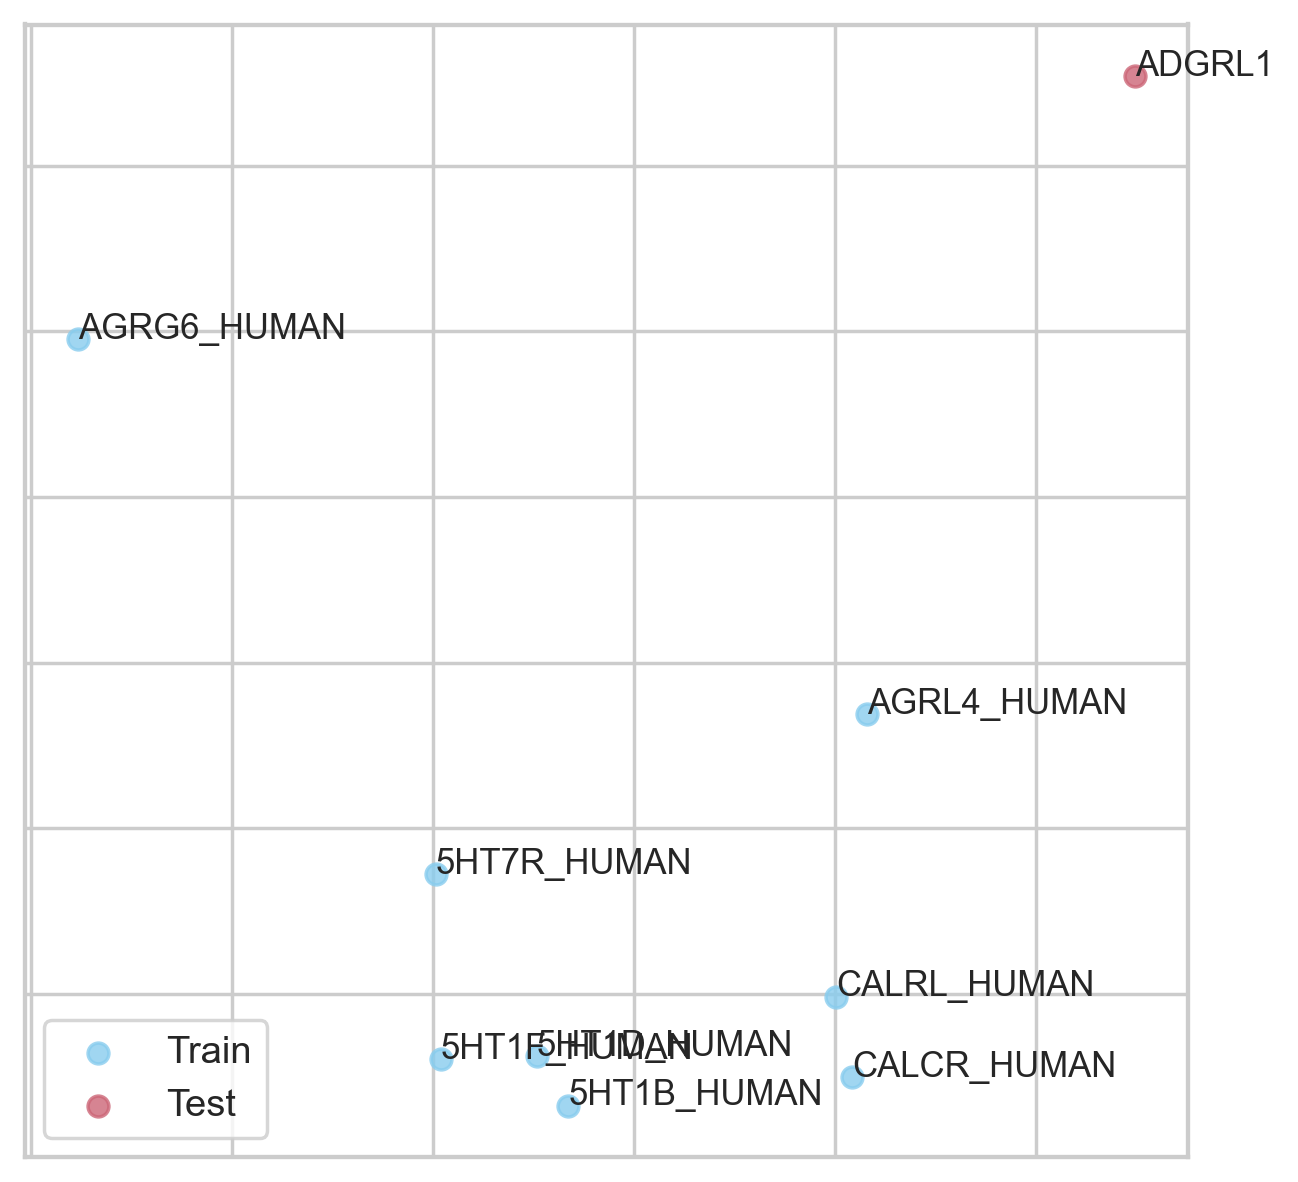

In [21]:
# now plot again but color these
set_pub_plot_context(context="notebook")
name_of_test = ['ADGRL1']
name_of_train = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)]['name']
test_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_test)].index.values
train_idxs = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)].index.values
fig = plt.figure(figsize=(6,6), dpi=250)
ax = fig.add_subplot(111)
x = components[train_idxs,0]
y = components[train_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[0])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Train")
label_point(pd.Series(x),pd.Series(y+.75),
            pd.Series(np.array(name_of_train)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)

x = components[test_idxs,0]
y = components[test_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[1])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Test")
label_point(pd.Series(x),pd.Series(y+.75),
            pd.Series(np.array(name_of_test)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.legend(loc="lower left",fancybox=True, frameon=True)